In [1]:
import xarray as xr
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
test_file = '../output/test.TEMdiag.nc'
ds = xr.open_dataset(test_file)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (time: 12, nbnd: 2, zalat: 90, lev: 58)
Coordinates:
    zalon      float64 ...
  * time       (time) object 1997-02-01 00:00:00 ... 1998-01-01 00:00:00
  * zalat      (zalat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lev        (lev) float64 3.018 5.445 9.087 14.25 ... 974.5 983.2 991.2 997.5
Dimensions without coordinates: nbnd
Data variables: (12/13)
    date       (time) int32 ...
    datesec    (time) int32 ...
    time_bnds  (time, nbnd) object ...
    uzm        (time, lev, zalat) float32 ...
    vzm        (time, lev, zalat) float32 ...
    epfy       (time, lev, zalat) float32 ...
    ...         ...
    vtem       (time, lev, zalat) float32 ...
    wtem       (time, lev, zalat) float32 ...
    psitem     (time, lev, zalat) float32 ...
    utendepfd  (time, lev, zalat) float32 ...
    utendvtem  (time, lev, zalat) float32 ...
    utendwtem  (time, lev, zalat) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              f.cam6_3_106.FLTHIST_v0a.ne30.dcs_non-ogw_ubcF.001
    logname:           hannay
    host:              cheyenne1
    initial_file:      /glade/p/cesm/amwg_dev/juliob/FWsc_ne30pg3_58L_GRID_48...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/se/ne30p...
    model_doi_url:     not_set
    time_period_freq:  month_1
    created:           2023-04-13

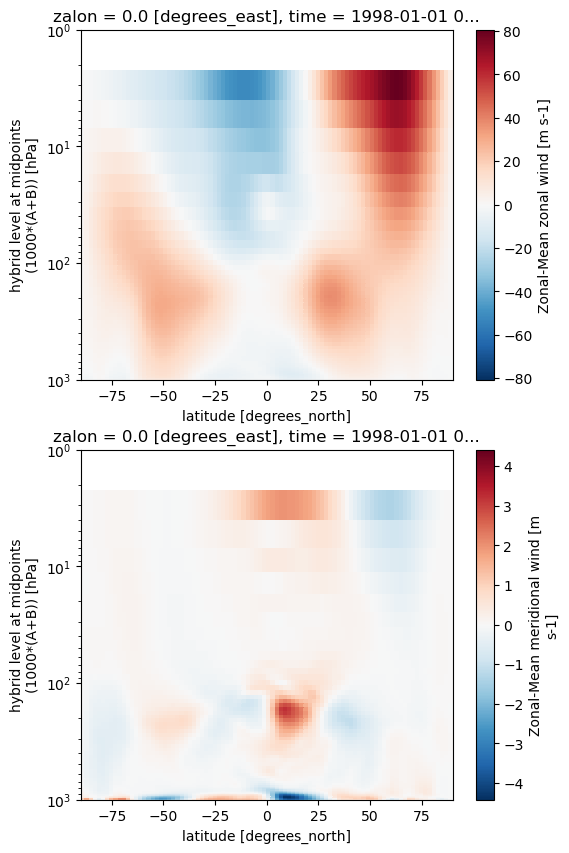

In [7]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
ds.uzm.isel(time=-1).plot(ax=axs[0], y='lev', yscale='log',ylim=[1e3,1])
ds.vzm.isel(time=-1).plot(ax=axs[1], y='lev', yscale='log',ylim=[1e3,1])
plt.show()

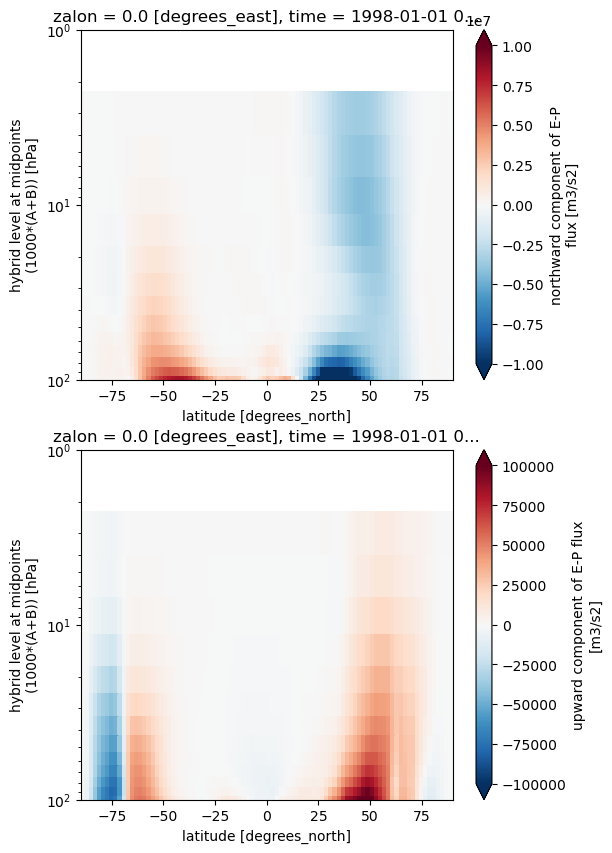

In [10]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
ds.epfy.isel(time=-1).plot(ax=axs[0], y='lev', yscale='log',vmax=1e7,ylim=[1e2,1])
ds.epfz.isel(time=-1).plot(ax=axs[1], y='lev', yscale='log',vmax=1e5,ylim=[1e2,1])
plt.show()

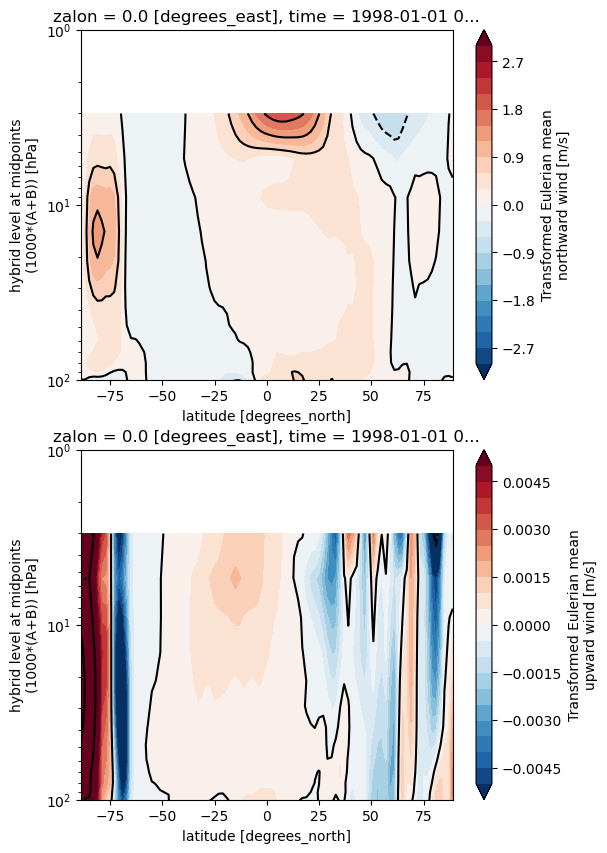

In [12]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
ds.vtem.isel(time=-1).plot.contourf(ax=axs[0], levels = 21, y='lev', yscale='log',vmax=3,vmin=-3,ylim=[1e2,1], cmap = 'RdBu_r')
ds.vtem.isel(time=-1).plot.contour(ax=axs[0], levels = 11, y='lev', yscale='log',vmax=3,vmin=-3,ylim=[1e2,1],
                                   colors='black', linestyles=None)

ds.wtem.isel(time=-1).plot.contourf(ax=axs[1], levels = 21, y='lev', yscale='log',vmax=0.005,vmin=-0.005,ylim=[1e2,1], cmap = 'RdBu_r')
ds.wtem.isel(time=-1).plot.contour(ax=axs[1], levels = 7, y='lev', yscale='log',vmax=0.03,vmin=-0.03,ylim=[1e2,1], 
                                   colors='black', linestyles=None)

plt.show()

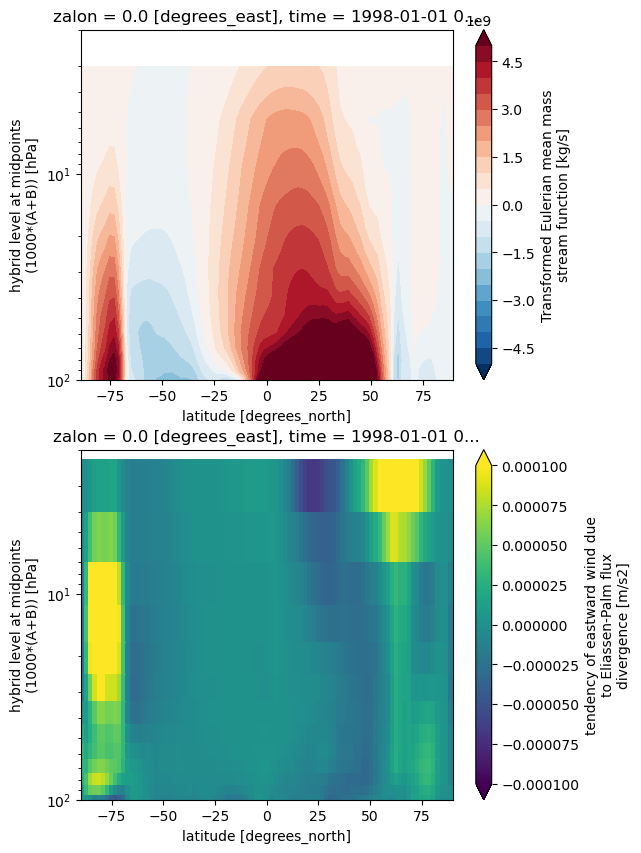

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
psitem1 = ds.psitem.isel(time=-1)
psitem1.plot.contourf(ax=axs[0], levels = 21, y='lev', yscale='log',vmax=5e9,ylim=[1e2,2])
#ds.psitem.isel(time=-1).plot.contourf(ax=axs[1], levels = 21, y='ilev', yscale='log',vmax=5e9,ylim=[1e2,1])

ds.utendepfd.isel(time=-1).plot(ax=axs[1], y='lev', yscale='log',vmax=0.0001,vmin=-0.0001,ylim=[1e2,2])
plt.show()

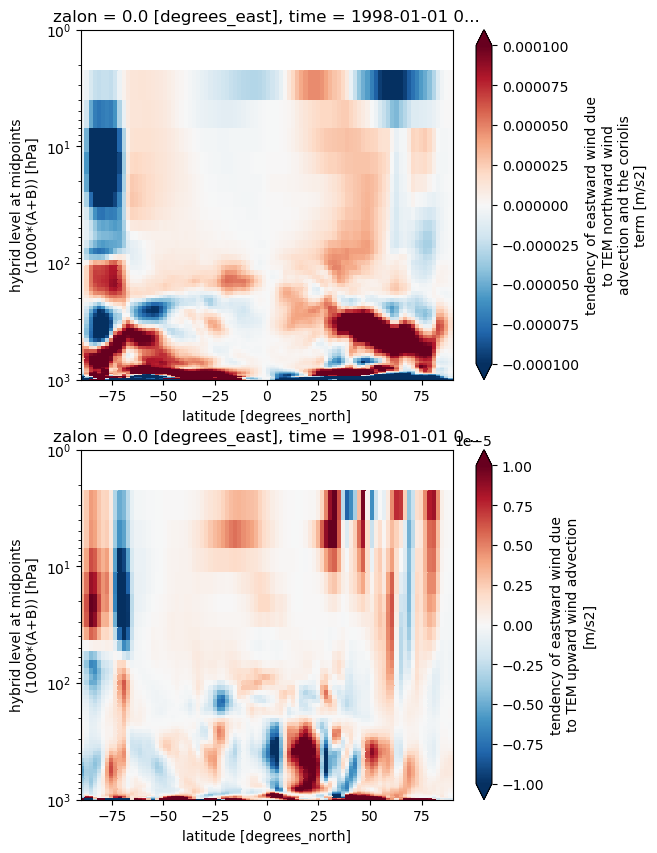

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(6,10))
ds.utendvtem.isel(time=-1).plot(ax=axs[0], y='lev', yscale='log',vmax=0.0001, ylim=[1e3,1])
ds.utendwtem.isel(time=-1).plot(ax=axs[1], y='lev', yscale='log',vmax=0.00001, ylim=[1e3,1])
plt.show()